In [2]:
!conda install -c conda-forge beautifulsoup4 --yes

!conda install -c conda-forge geopy --yes

!conda install -c conda-forge folium=0.5.0 --yes

print('Libraries installed!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    scipy-1.4.1                |   py36h921218d_0        18.9 MB  conda-forge
    beautifulsoup4-4.8.2       |           py36_0         157 KB  conda-forg

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests
from pandas.io.json import json_normalize
import json

import requests

from bs4 import BeautifulSoup

from geopy.geocoders import Nominatim

import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

print('Libraries imported!')

Libraries imported!


In [8]:

import urllib.request # open and read URLs

import json # handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import requests # handle requests
import pandas as pd # process data as dataframes with Pandas
import numpy as np # handle data in a vectorized manner with NumPy

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't installed the GeoPy geocoding library yet
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't installed the Folium library yet
import folium # map rendering library

# Matplolib plotting library and associated modules
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans # for K-Means clustering with Scikit-Learn

print("Libraries imported!")

Libraries imported!


In [29]:
# Get data about Paris geography from https://opendata.paris.fr website

with urllib.request.urlopen("https://opendata.paris.fr/explore/dataset/arrondissements/download?format=json&timezone=Europe/Berlin&use_labels_for_header=true") as url:
   data = json.loads(url.read())
data[0]

{'datasetid': 'arrondissements',
 'recordid': 'f4a2fb129afd18af46479f95c0701107d9e9ad31',
 'fields': {'n_sq_co': 750001537,
  'perimetre': 4519.26364836,
  'l_ar': '3ème Ardt',
  'longueur': 4519.07198175,
  'surface': 1170882.82818778,
  'geom_x_y': [48.86287238, 2.3600009859],
  'geom': {'type': 'Polygon',
   'coordinates': [[[2.363828096062925, 48.86750443060333],
     [2.363889283103472, 48.86746799613759],
     [2.363895272057997, 48.86746439462841],
     [2.36390615161445, 48.86745794031929],
     [2.3639604108556, 48.86742562395425],
     [2.364050888403437, 48.86737182228858],
     [2.364136202212002, 48.86732090069028],
     [2.364196150694383, 48.86728527518643],
     [2.364231046057404, 48.867264504998545],
     [2.3642488892099323, 48.8672538841255],
     [2.364262374754115, 48.867231487510104],
     [2.364317526957068, 48.8671399217101],
     [2.364378833526726, 48.86703799037503],
     [2.364437745426764, 48.86694013469137],
     [2.36445371308141, 48.86691372487684],
   

In [31]:
# Tranform the json data into a Pandas dataframe

par_nei = json_normalize(data)
par_nei.head()

,datasetid,recordid,record_timestamp,fields.n_sq_co,fields.perimetre,fields.l_ar,fields.longueur,fields.surface,fields.geom_x_y,fields.geom.type,fields.geom.coordinates,fields.objectid,fields.n_sq_ar,fields.l_aroff,fields.c_arinsee,fields.c_ar,geometry.type,geometry.coordinates
0,arrondissements,f4a2fb129afd18af46479f95c0701107d9e9ad31,2020-01-03T10:00:30.421+01:00,750001537,4519.263648,3ème Ardt,4519.071982,1.170883e+06,"[48.86287238, 2.3600009859]",Polygon,"[[[2.363828096062925, 48.86750443060333], [2.3...",3,750000003,Temple,75103,3,Point,"[2.3600009859, 48.86287238]"
1,arrondissements,65aa911354d33d51fd8b284d57deefc4b585cd67,2020-01-03T10:00:30.421+01:00,750001537,6054.936862,1er Ardt,6054.680862,1.824613e+06,"[48.8625627018, 2.33644336205]",Polygon,"[[[2.328007329038849, 48.86991742140716], [2.3...",1,750000001,Louvre,75101,1,Point,"[2.33644336205, 48.8625627018]"
2,arrondissements,6e8fa4f2d15c85bf4f2f62d19019bcfd17908d8d,2020-01-03T10:00:30.421+01:00,750001537,10317.483310,14ème Ardt,10316.720258,5.614877e+06,"[48.8292445005, 2.3265420442]",Polygon,"[[[2.333806501627019, 48.840609219799795], [2....",14,750000014,Observatoire,75114,14,Point,"[2.3265420442, 48.8292445005]"
3,arrondissements,e5e8c417f97636b59f2aa3f670f8959f8ae419af,2020-01-03T10:00:30.421+01:00,750001537,10704.940486,20ème Ardt,10704.483774,5.983446e+06,"[48.8634605789, 2.40118812928]",Polygon,"[[[2.412765012638637, 48.875474477493356], [2....",20,750000020,Ménilmontant,75120,20,Point,"[2.40118812928, 48.8634605789]"
4,arrondissements,204b091a2679e51577024ed41bc0d205d932b7d7,2020-01-03T10:00:30.421+01:00,750001537,8099.424883,7ème Ardt,8099.033151,4.090057e+06,"[48.8561744288, 2.31218769148]",Polygon,"[[[2.320902853673183, 48.863057390616895], [2....",7,750000007,Palais-Bourbon,75107,7,Point,"[2.31218769148, 48.8561744288]"


In [32]:
# Format the dataframe

df_temp1 = par_nei[["fields.c_ar","fields.l_aroff","fields.geom_x_y"]]
df_temp2 = pd.DataFrame(par_nei['fields.geom_x_y'].tolist(), columns=["Latitude", "Longitude"])
df_drop = df_temp1.drop(["fields.geom_x_y"], axis = 1)
df_temp = pd.concat([df_drop,df_temp2], axis=1)
df_temp.columns = ["Arrondissement", "Neighborhood", "Latitude", "Longitude"]
paris_data = df_temp.sort_values(["Arrondissement"]).reset_index(drop=True)

# change neighborhood name Élysée to Elysée
paris_data.loc[paris_data.Neighborhood == "Élysée", ["Neighborhood"]] = "Elysée"

paris_data

,Arrondissement,Neighborhood,Latitude,Longitude
0,1,Louvre,48.862563,2.336443
1,2,Bourse,48.868279,2.342803
2,3,Temple,48.862872,2.360001
3,4,Hôtel-de-Ville,48.854341,2.357630
4,5,Panthéon,48.844443,2.350715
5,6,Luxembourg,48.849130,2.332898
6,7,Palais-Bourbon,48.856174,2.312188
7,8,Elysée,48.872721,2.312554
8,9,Opéra,48.877164,2.337458
9,10,Entrepôt,48.876130,2.360728


In [33]:
# Use GeoPy library to get the latitude and longitude values of Paris

address = "Paris, FR"

geolocator = Nominatim(user_agent="my-application")
location_par = geolocator.geocode(address)
latitude_par = location_par.latitude
longitude_par = location_par.longitude

print("The geograpical coordinates of Paris are {}, {}.".format(latitude_par, longitude_par))

The geograpical coordinates of Paris are 48.8566969, 2.3514616.


In [34]:
# Create a leaflet map of Paris with arrondissements superimposed on top

# create a map of Paris using latitude and longitude values
map_paris = folium.Map(location=[latitude_par, longitude_par], zoom_start=12)

# add markers to the map
for lat, lng, arrondissement, neighborhood in zip(paris_data["Latitude"], paris_data["Longitude"], paris_data["Arrondissement"], paris_data["Neighborhood"]):
    label = "{}, {}".format(arrondissement,neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = "blue",
        fill = True,
        fill_color = "#3186cc",
        fill_opacity = 0.7,
        parse_html = False).add_to(map_paris)  
    
map_paris

In [39]:
# Get data about New York geography from https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json

with urllib.request.urlopen("https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json") as file:
   newyork_data = json.loads(file.read())
#newyork_data

In [14]:
# Tranform the json data into a formatted Pandas dataframe

# all the relevant data is in the features key, which is basically a list of the neighborhoods
neighborhoods_data = newyork_data["features"]

# define the dataframe columns
column_names = ["Borough", "Neighborhood", "Latitude", "Longitude"] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

# loop through the data and fill the dataframe one row at a time
for data in neighborhoods_data:
    borough = neighborhood_name = data["properties"]["borough"] 
    neighborhood_name = data["properties"]["name"]
        
    neighborhood_latlon = data["geometry"]["coordinates"]
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({"Borough": borough,
                                          "Neighborhood": neighborhood_name,
                                          "Latitude": neighborhood_lat,
                                          "Longitude": neighborhood_lon}, ignore_index=True)
    
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [15]:

manhattan_data = neighborhoods[neighborhoods["Borough"] == "Manhattan"].reset_index(drop=True)
manhattan_data

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688
5,Manhattan,Manhattanville,40.816934,-73.957385
6,Manhattan,Central Harlem,40.815976,-73.943211
7,Manhattan,East Harlem,40.792249,-73.944182
8,Manhattan,Upper East Side,40.775639,-73.960508
9,Manhattan,Yorkville,40.775930,-73.947118


In [16]:

address = "Manhattan, NY"

geolocator = Nominatim(user_agent="my-application")
location_man = geolocator.geocode(address)
latitude_man = location_man.latitude
longitude_man = location_man.longitude

print("The geograpical coordinates of Manhattan are {}, {}.".format(latitude_man, longitude_man))

The geograpical coordinates of Manhattan are 40.7896239, -73.9598939.


In [17]:
# Create a leaflet map of Manhattan with neighborhoods superimposed on top

# create a map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude_man, longitude_man], zoom_start=11)

# add markers to the map
for lat, lng, neighborhood in zip(manhattan_data["Latitude"], manhattan_data["Longitude"], manhattan_data["Neighborhood"]):
    label = "{}".format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = "red",
        fill = True,
        fill_color = "#E03450",
        fill_opacity = 0.7,
        parse_html = False).add_to(map_manhattan)  
    
map_manhattan

In [18]:
CLIENT_ID = "MF4VNN5LCLCUG1F01NH2JR2SJ0ILYOGLVCDHD2KGNXIBTT1U" 
CLIENT_SECRET = "GQ04P00OKBMLX0EUM0FGO5JOMA44JFSAEUOTFYGZY35XOSSC" 
VERSION = "20180605"

In [40]:
# Define a function to gather recommended venues, with specifically the name and category, using the explore API

def getNearbyVenues_paris(arrondissements, names, latitudes, longitudes, radius=750, limit=100):
    
    venues_list = []
    for arrondissement, name, lat, lng in zip(arrondissements, names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = "https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]["items"]
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            arrondissement,
            name, 
            lat, 
            lng, 
            v["venue"]["name"], 
            v["venue"]["location"]["lat"], 
            v["venue"]["location"]["lng"],  
               v["venue"]["categories"][0]["name"]) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ["Arrondissement",
                  "Neighborhood", 
                  "Neighborhood Latitude", 
                  "Neighborhood Longitude", 
                  "Venue", 
                  "Venue Latitude", 
                  "Venue Longitude", 
                  "Venue Category"]
    
    return(nearby_venues)

In [41]:
# Create a new dataframe called paris_venues that combines the recommended venues from Foursquare 
# and neigborhoods geo-information from the city dataset

paris_venues = getNearbyVenues_paris(arrondissements=paris_data["Arrondissement"],
                               names = paris_data["Neighborhood"],
                               latitudes = paris_data["Latitude"],
                               longitudes = paris_data["Longitude"]
                               )

Louvre
Bourse
Temple
Hôtel-de-Ville
Panthéon
Luxembourg
Palais-Bourbon
Elysée
Opéra
Entrepôt
Popincourt
Reuilly
Gobelins
Observatoire
Vaugirard
Passy
Batignolles-Monceau
Buttes-Montmartre
Buttes-Chaumont
Ménilmontant


In [42]:
print(paris_venues.shape)
print("There are {} unique categories.".format(len(paris_venues["Venue Category"].unique())))
paris_venues.head()

(1815, 8)
There are 230 unique categories.


,Arrondissement,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1,Louvre,48.862563,2.336443,Musée du Louvre,48.860847,2.336440,Art Museum
1,1,Louvre,48.862563,2.336443,Palais Royal,48.863236,2.337127,Historic Site
2,1,Louvre,48.862563,2.336443,Comédie-Française,48.863088,2.336612,Theater
3,1,Louvre,48.862563,2.336443,Cour Napoléon,48.861172,2.335088,Plaza
4,1,Louvre,48.862563,2.336443,Place du Palais Royal,48.862523,2.336688,Plaza


In [43]:
# Define a function to gather recommended venues, with specifically the name and category, using the explore API

def getNearbyVenues_manhattan(boroughs, names, latitudes, longitudes, radius=750, limit=100):
    
    venues_list = []
    for borough, name, lat, lng in zip(boroughs, names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = "https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]["items"]
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            borough,
            name, 
            lat, 
            lng, 
            v["venue"]["name"], 
            v["venue"]["location"]["lat"], 
            v["venue"]["location"]["lng"],  
            v["venue"]["categories"][0]["name"]) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ["Borough",
                  "Neighborhood", 
                  "Neighborhood Latitude", 
                  "Neighborhood Longitude", 
                  "Venue", 
                  "Venue Latitude", 
                  "Venue Longitude", 
                  "Venue Category"]
    
    return(nearby_venues)

In [44]:
# Create a new dataframe called manhattan_venues that combines the recommended venues from Foursquare 
# and neigborhoods geo-information from the city dataset

manhattan_venues = getNearbyVenues_manhattan(boroughs=manhattan_data["Borough"],
                               names = manhattan_data["Neighborhood"],
                               latitudes = manhattan_data["Latitude"],
                               longitudes = manhattan_data["Longitude"]
                               )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [48]:
print(manhattan_venues.shape)
print("There are {} unique categories.".format(len(manhattan_venues["Venue Category"].unique())))
manhattan_venues.head()

(3848, 8)
There are 330 unique categories.


,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Manhattan,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Manhattan,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Manhattan,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Manhattan,Marble Hill,40.876551,-73.91066,Sam's Pizza,40.879435,-73.905859,Pizza Place
4,Manhattan,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [90]:

paris_onehot = pd.get_dummies(paris_venues[["Venue Category"]], prefix="", prefix_sep="")

# add arrondissement and neighborhood column back to dataframe
paris_onehot["Arrondissement"] = paris_venues["Arrondissement"] 
paris_onehot["Neighborhood"] = paris_venues["Neighborhood"] 

# move arrondissement and neighborhood columns to the first columns
fixed_columns = [paris_onehot.columns[-2], paris_onehot.columns[-1]] + list(paris_onehot.columns[:-2])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

,Arrondissement,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Baby Store,Bagel Shop,Bakery,Bar,Basketball Court,Basque Restaurant,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Breton Restaurant,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burgundian Restaurant,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Canal,Candy Store,Cantonese Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Corsican Restaurant,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Donut Shop,Drive-in Theater,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food & Drink Shop,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Jiangxi Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Lyonese Bouchon,Market,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Optical Shop,Organic Grocery,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recording Studio,Resort,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Sandwich Place,Savoyard Restaurant,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanxi Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soba Restaurant,Soccer Stadium,Southwestern French Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Trail,Train Station,Tram Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,1,Louvre,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [91]:
# Group by neighborhood and by the mean of frequency for each category

paris_grouped = paris_onehot.groupby("Neighborhood").mean().reset_index()
paris_grouped.head()

,Neighborhood,Arrondissement,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Baby Store,Bagel Shop,Bakery,Bar,Basketball Court,Basque Restaurant,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Breton Restaurant,Brewery,Bridge,Bubble Tea Shop,Burger Joint,Burgundian Restaurant,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Canal,Candy Store,Cantonese Restaurant,Castle,Cemetery,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Corsican Restaurant,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Donut Shop,Drive-in Theater,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food & Drink Shop,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gastropub,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Jiangxi Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Lyonese Bouchon,Market,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Optical Shop,Organic Grocery,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recording Studio,Resort,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Sandwich Place,Savoyard Restaurant,Scandinavian Restaurant,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shanxi Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soba Restaurant,Soccer Stadium,Southwestern French Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Trail,Train Station,Tram Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Batignolles-Monceau,17,0.0,0.00,0.010638,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.06383,0.021277,0.0,0.0,0.0,0.00,0.00,0.00,0.042553,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.010638,0.0,0.00,0.0,0.00,0.010638,0.0,0.0,0.0,0.0,0.0,0.042553,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.010638,0.010638,0.00,0.00,0.010638,0.00,0.0,0.010638,0.0,0.010638,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.010638,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.12766,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.010638,0.00,0.0,0.010638,0.00,0.00,0.0,0.0,0.00,0.12766,0.00,0.00,0.010638,0.00,0.00,0.0,0.0,0.117021,0.031915,0.00,0.

In [92]:
# Top 5 most common categories of venues for each neighborhood 

num_top_venues = 5

for hood in paris_grouped["Neighborhood"]:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped["Neighborhood"]==hood].T.reset_index()
    temp.columns = ["venue","freq"]
    temp = temp.iloc[2:]
    temp["freq"] = temp["freq"].astype(float)
    temp = temp.round({"freq": 2})
    print(temp.sort_values("freq", ascending=False).reset_index(drop=True).head(num_top_venues))
    print("\n")

----Batignolles-Monceau----
                venue  freq
0               Hotel  0.13
1   French Restaurant  0.13
2  Italian Restaurant  0.12
3              Bakery  0.06
4               Plaza  0.04


----Bourse----
               venue  freq
0  French Restaurant  0.14
1           Wine Bar  0.07
2             Bistro  0.05
3       Cocktail Bar  0.05
4              Hotel  0.04


----Buttes-Chaumont----
               venue  freq
0                Bar  0.12
1  French Restaurant  0.07
2              Hotel  0.05
3               Café  0.04
4        Supermarket  0.04


----Buttes-Montmartre----
               venue  freq
0                Bar  0.14
1  French Restaurant  0.14
2        Pizza Place  0.05
3             Bistro  0.05
4              Hotel  0.04


----Elysée----
               venue  freq
0              Hotel  0.18
1  French Restaurant  0.15
2             Bakery  0.03
3    Thai Restaurant  0.03
4            Theater  0.03


----Entrepôt----
               venue  freq
0        Coffee Shop  

In [93]:

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [94]:
# Create a new dataframe and display the top 5 venues for each neighborhood

num_top_venues = 10

indicators = ["st", "nd", "rd"]

# create columns according to number of top venues
columns = ["Arrondissement", "Neighborhood"]
for ind in np.arange(num_top_venues):
    try:
        columns.append("{}{} Most Common Venue".format(ind+1, indicators[ind]))
    except:
        columns.append("{}th Most Common Venue".format(ind+1))

# create a new dataframe
paris_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
paris_neighborhoods_venues_sorted[[ "Arrondissement","Neighborhood"]] = paris_grouped[["Arrondissement","Neighborhood"]]

for ind in np.arange(paris_grouped.shape[0]):
    paris_neighborhoods_venues_sorted.iloc[ind, 2:] = return_most_common_venues(paris_grouped.iloc[ind, 1:], num_top_venues)

paris_neighborhoods_venues_sorted

,Arrondissement,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,17,Batignolles-Monceau,Hotel,French Restaurant,Italian Restaurant,Bakery,Plaza,Bistro,Café,Japanese Restaurant,Restaurant,Pizza Place
1,2,Bourse,French Restaurant,Wine Bar,Bistro,Cocktail Bar,Italian Restaurant,Hotel,Bakery,Restaurant,Coffee Shop,Indie Movie Theater
2,19,Buttes-Chaumont,Bar,French Restaurant,Hotel,Café,Supermarket,Bistro,Seafood Restaurant,Pizza Place,Italian Restaurant,Burger Joint
3,18,Buttes-Montmartre,Bar,French Restaurant,Pizza Place,Bistro,Hotel,Fast Food Restaurant,Coffee Shop,Italian Restaurant,Café,Convenience Store
4,8,Elysée,Hotel,French Restaurant,Theater,Cosmetics Shop,Clothing Store,Bakery,Thai Restaurant,Shoe Store,Plaza,Art Gallery
5,10,Entrepôt,Coffee Shop,French Restaurant,Indian Restaurant,Cocktail Bar,Japanese Restaurant,Asian Restaurant,Bistro,Café,Pizza Place,Seafood Restaurant
6,13,Gobelins,Vietnamese Restaurant,Thai Restaurant,Asian Restaurant,Chinese Restaurant,French Restaurant,Hotel,Japanese Restaurant,Bakery,Juice Bar,Cambodian Restaurant
7,4,Hôtel-de-Ville,French Restaurant,Ice Cream Shop,Pastry Shop,Hotel,Clothing Store,Bakery,Garden,Wine Bar,Plaza,Art Gallery
8,1,Louvre,French Restaurant,Japanese Restaurant,Hotel,Plaza,Café,Coffee Shop,Historic Site,Bakery,Udon Restaurant,Art Museum
9,6,Luxembourg,French Restaurant,Italian Restaurant,Wine Bar,Chocolate Shop,Plaza,Bakery,Seafood Restaurant,Café,Sandwich Place,Pastry Shop


In [95]:
# one hot encoding

manhattan_onehot = pd.get_dummies(manhattan_venues[["Venue Category"]], prefix="", prefix_sep="")

# add arrondissement and neighborhood column back to dataframe
manhattan_onehot["Neighborhood"] = manhattan_venues["Neighborhood"] 

# move arrondissement and neighborhood columns to the first columns
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Duty-free Shop,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Ski Shop,Smoke Shop,Smooth

In [59]:
# Group by neighborhood and by the mean of frequency for each category

manhattan_grouped = manhattan_onehot.groupby("Neighborhood").mean().reset_index()
manhattan_grouped.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Duty-free Shop,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Ski Shop,Smoke Shop,Smooth

In [60]:

num_top_venues = 5

for hood in manhattan_grouped["Neighborhood"]:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped["Neighborhood"]==hood].T.reset_index()
    temp.columns = ["venue","freq"]
    temp = temp.iloc[1:]
    temp["freq"] = temp["freq"].astype(float)
    temp = temp.round({"freq": 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print("\n")

----Battery Park City----
           venue  freq
0    Coffee Shop  0.08
1           Park  0.07
2          Hotel  0.04
3          Plaza  0.03
4  Memorial Site  0.03


----Carnegie Hill----
         venue  freq
0  Pizza Place  0.06
1       Bakery  0.05
2  Coffee Shop  0.05
3          Gym  0.04
4         Café  0.04


----Central Harlem----
                venue  freq
0         Coffee Shop  0.05
1    Tapas Restaurant  0.03
2  African Restaurant  0.03
3                 Bar  0.03
4                 Gym  0.03


----Chelsea----
                venue  freq
0         Coffee Shop  0.06
1              Bakery  0.06
2      Ice Cream Shop  0.04
3         Art Gallery  0.04
4  Italian Restaurant  0.03


----Chinatown----
                 venue  freq
0   Chinese Restaurant  0.08
1       Ice Cream Shop  0.05
2  American Restaurant  0.04
3         Cocktail Bar  0.04
4          Coffee Shop  0.03


----Civic Center----
               venue  freq
0        Coffee Shop  0.06
1              Hotel  0.06
2  French

In [71]:

num_top_venues = 10

indicators = ["st", "nd", "rd"]

# create columns according to number of top venues
columns = ["Neighborhood"]
for ind in np.arange(num_top_venues):
    try:
        columns.append("{}{} Most Common Venue".format(ind+1, indicators[ind]))
    except:
        columns.append("{}th Most Common Venue".format(ind+1))

# create a new dataframe
manhattan_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
manhattan_neighborhoods_venues_sorted[["Neighborhood"]] = manhattan_grouped[["Neighborhood"]]

for ind in np.arange(manhattan_grouped.shape[0]):
    manhattan_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

manhattan_neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Coffee Shop,Park,Hotel,Plaza,Grocery Store,Memorial Site,Dog Run,Food Court,Jewelry Store,Burger Joint
1,Carnegie Hill,Pizza Place,Bakery,Coffee Shop,Café,Gym,Yoga Studio,Bookstore,Gym / Fitness Center,Art Museum,Indian Restaurant
2,Central Harlem,Coffee Shop,African Restaurant,Tapas Restaurant,Chinese Restaurant,Bar,Southern / Soul Food Restaurant,Gym,American Restaurant,Theater,Grocery Store
3,Chelsea,Coffee Shop,Bakery,Art Gallery,Ice Cream Shop,American Restaurant,Italian Restaurant,Theater,French Restaurant,Pet Store,Nightclub
4,Chinatown,Chinese Restaurant,Ice Cream Shop,American Restaurant,Cocktail Bar,Dumpling Restaurant,Mexican Restaurant,Coffee Shop,Sandwich Place,Bakery,Hotpot Restaurant
5,Civic Center,Coffee Shop,Hotel,French Restaurant,American Restaurant,Spa,Cocktail Bar,Yoga Studio,Café,Gym / Fitness Center,Wine Bar
6,Clinton,Theater,Italian Restaurant,Gym / Fitness Center,Coffee Shop,American Restaurant,Cocktail Bar,Burger Joint,Hotel,Bakery,Wine Shop
7,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Deli / Bodega,Café,Latin American Restaurant,Pizza Place,Fountain,Chinese Restaurant,Scenic Lookout
8,East Village,Coffee Shop,Pizza Place,Bar,Cocktail Bar,Ice Cream Shop,Wine Bar,Japanese Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Gourmet Shop
9,Financial District,Coffee Shop,Pizza Place,Gym,American Restaurant,Cocktail Bar,Steakhouse,Food Truck,Park,Hotel,Wine Shop


In [97]:
# Create the metric (same squared distances) to identify the best k

columns = ["Neighborhood", "Arrondissement"]
paris_grouped_clustering = paris_grouped.drop(columns, axis = 1)

Sum_of_squared_distances = []

ks = range(1,11)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(paris_grouped_clustering)
    Sum_of_squared_distances.append(kmeans.inertia_)

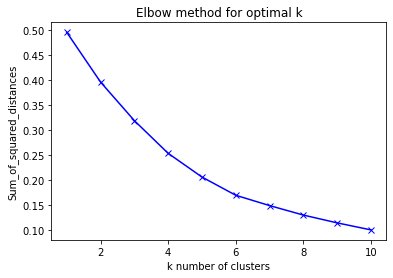

In [98]:
# Plot of sum of squared distances

plt.plot(ks, Sum_of_squared_distances, "bx-")
plt.xlabel("k number of clusters")
plt.ylabel("Sum_of_squared_distances")
plt.title("Elbow method for optimal k")
plt.show()

In [99]:
# Cluster the venues of Paris into 5 clusters

# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 1, 1, 1, 3, 1, 4, 1, 1, 1], dtype=int32)

In [100]:
paris_merged = paris_data
 
# add clustering labels
paris_merged["Cluster Labels"] = kmeans.labels_
paris_merged = pd.merge(paris_merged, paris_neighborhoods_venues_sorted,  how = "left", left_on = ["Arrondissement","Neighborhood"], right_on = ["Arrondissement","Neighborhood"])

paris_merged

,Arrondissement,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Louvre,48.862563,2.336443,3,French Restaurant,Japanese Restaurant,Hotel,Plaza,Café,Coffee Shop,Historic Site,Bakery,Udon Restaurant,Art Museum
1,2,Bourse,48.868279,2.342803,1,French Restaurant,Wine Bar,Bistro,Cocktail Bar,Italian Restaurant,Hotel,Bakery,Restaurant,Coffee Shop,Indie Movie Theater
2,3,Temple,48.862872,2.360001,1,French Restaurant,Coffee Shop,Art Gallery,Gourmet Shop,Bistro,Moroccan Restaurant,Bakery,Boutique,Burger Joint,Japanese Restaurant
3,4,Hôtel-de-Ville,48.854341,2.357630,1,French Restaurant,Ice Cream Shop,Pastry Shop,Hotel,Clothing Store,Bakery,Garden,Wine Bar,Plaza,Art Gallery
4,5,Panthéon,48.844443,2.350715,3,French Restaurant,Italian Restaurant,Bakery,Museum,Coffee Shop,Bar,Plaza,Creperie,Café,Wine Bar
5,6,Luxembourg,48.849130,2.332898,1,French Restaurant,Italian Restaurant,Wine Bar,Chocolate Shop,Plaza,Bakery,Seafood Restaurant,Café,Sandwich Place,Pastry Shop
6,7,Palais-Bourbon,48.856174,2.312188,4,French Restaurant,Hotel,Italian Restaurant,Plaza,Coffee Shop,Café,Historic Site,Cocktail Bar,History Museum,Cheese Shop
7,8,Elysée,48.872721,2.312554,1,Hotel,French Restaurant,Theater,Cosmetics Shop,Clothing Store,Bakery,Thai Restaurant,Shoe Store,Plaza,Art Gallery
8,9,Opéra,48.877164,2.337458,1,French Restaurant,Hotel,Bakery,Cocktail Bar,Bistro,Italian Restaurant,Pizza Place,Café,Cheese Shop,Wine Bar
9,10,Entrepôt,48.876130,2.360728,1,Coffee Shop,French Restaurant,Indian Restaurant,Cocktail Bar,Japanese Restaurant,Asian Restaurant,Bistro,Café,Pizza Place,Seafood Restaurant


In [101]:
# create map
map_clusters = folium.Map(location=[latitude_par, longitude_par], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged["Latitude"], paris_merged["Longitude"], paris_merged["Neighborhood"], paris_merged["Cluster Labels"]):
    label = folium.Popup(str(poi) + "Cluster" + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = rainbow[cluster-1],
        fill = True,
        fill_color = rainbow[cluster-1],
        fill_opacity = 0.7).add_to(map_clusters)
       
map_clusters

In [102]:
# Create the metric (same squared distances) to identify the best k

columns = ["Neighborhood"]
manhattan_grouped_clustering = manhattan_grouped.drop(columns, axis = 1)

Sum_of_squared_distances = []

ks = range(1,11)
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(manhattan_grouped_clustering)
    Sum_of_squared_distances.append(kmeans.inertia_)

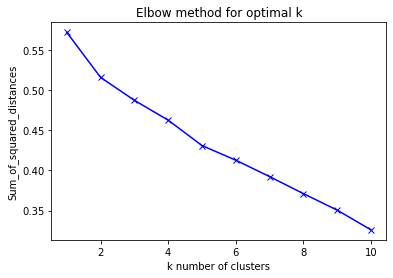

In [103]:
# Plot of sum of squared distances

plt.plot(ks, Sum_of_squared_distances, "bx-")
plt.xlabel("k number of clusters")
plt.ylabel("Sum_of_squared_distances")
plt.title("Elbow method for optimal k")
plt.show()

In [64]:

# set number of clusters
kclusters = 8

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 0, 2, 6, 6, 3, 7, 4, 6, 3], dtype=int32)

In [77]:
manhattan_merged = manhattan_data

# add clustering labels
manhattan_merged["Cluster Labels"] = kmeans.labels_

# merge manhattan_grouped with manhattann_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(manhattan_neighborhoods_venues_sorted.set_index("Neighborhood"), on="Neighborhood")

manhattan_merged # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,3,Spanish Restaurant,Bus Station,Sandwich Place,Coffee Shop,Pizza Place,Donut Shop,Pharmacy,Deli / Bodega,Bank,Athletics & Sports
1,Manhattan,Chinatown,40.715618,-73.994279,0,Chinese Restaurant,Ice Cream Shop,American Restaurant,Cocktail Bar,Dumpling Restaurant,Mexican Restaurant,Coffee Shop,Sandwich Place,Bakery,Hotpot Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,2,Bakery,Pizza Place,Latin American Restaurant,Café,Mexican Restaurant,Grocery Store,Deli / Bodega,Chinese Restaurant,Tapas Restaurant,Bar
3,Manhattan,Inwood,40.867684,-73.921210,6,Wine Bar,Mexican Restaurant,Latin American Restaurant,Deli / Bodega,Pizza Place,Spanish Restaurant,Lounge,Café,Restaurant,Bakery
4,Manhattan,Hamilton Heights,40.823604,-73.949688,6,Deli / Bodega,Café,Coffee Shop,Mexican Restaurant,Sandwich Place,Bar,Park,Chinese Restaurant,Sushi Restaurant,Pizza Place
5,Manhattan,Manhattanville,40.816934,-73.957385,3,Park,Italian Restaurant,Chinese Restaurant,Pizza Place,Coffee Shop,Mexican Restaurant,Indian Restaurant,Deli / Bodega,Café,Supermarket
6,Manhattan,Central Harlem,40.815976,-73.943211,7,Coffee Shop,African Restaurant,Tapas Restaurant,Chinese Restaurant,Bar,Southern / Soul Food Restaurant,Gym,American Restaurant,Theater,Grocery Store
7,Manhattan,East Harlem,40.792249,-73.944182,4,Mexican Restaurant,Bakery,Thai Restaurant,Deli / Bodega,Café,Latin American Restaurant,Pizza Place,Fountain,Chinese Restaurant,Scenic Lookout
8,Manhattan,Upper East Side,40.775639,-73.960508,6,Exhibit,Coffee Shop,Bakery,Gym / Fitness Center,Art Gallery,Italian Restaurant,French Restaurant,Art Museum,Yoga Studio,Hotel
9,Manhattan,Yorkville,40.775930,-73.947118,3,Italian Restaurant,Gym,Coffee Shop,Bar,Ice Cream Shop,Japanese Restaurant,Deli / Bodega,Bagel Shop,Gym / Fitness Center,Pizza Place


In [66]:
map_clusters = folium.Map(location=[latitude_man, longitude_man], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged["Latitude"], manhattan_merged["Longitude"], manhattan_merged["Neighborhood"], manhattan_merged["Cluster Labels"]):
    label = folium.Popup(str(poi) + "Cluster" + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = rainbow[cluster-1],
        fill = True,
        fill_color = rainbow[cluster-1],
        fill_opacity = 0.7).add_to(map_clusters)
       
map_clusters

In [104]:
# Cluster 1

paris_merged.loc[paris_merged["Cluster Labels"] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Buttes-Montmartre,Bar,French Restaurant,Pizza Place,Bistro,Hotel,Fast Food Restaurant,Coffee Shop,Italian Restaurant,Café,Convenience Store


In [105]:
# Cluster 2

paris_merged.loc[paris_merged["Cluster Labels"] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bourse,French Restaurant,Wine Bar,Bistro,Cocktail Bar,Italian Restaurant,Hotel,Bakery,Restaurant,Coffee Shop,Indie Movie Theater
2,Temple,French Restaurant,Coffee Shop,Art Gallery,Gourmet Shop,Bistro,Moroccan Restaurant,Bakery,Boutique,Burger Joint,Japanese Restaurant
3,Hôtel-de-Ville,French Restaurant,Ice Cream Shop,Pastry Shop,Hotel,Clothing Store,Bakery,Garden,Wine Bar,Plaza,Art Gallery
5,Luxembourg,French Restaurant,Italian Restaurant,Wine Bar,Chocolate Shop,Plaza,Bakery,Seafood Restaurant,Café,Sandwich Place,Pastry Shop
7,Elysée,Hotel,French Restaurant,Theater,Cosmetics Shop,Clothing Store,Bakery,Thai Restaurant,Shoe Store,Plaza,Art Gallery
8,Opéra,French Restaurant,Hotel,Bakery,Cocktail Bar,Bistro,Italian Restaurant,Pizza Place,Café,Cheese Shop,Wine Bar
9,Entrepôt,Coffee Shop,French Restaurant,Indian Restaurant,Cocktail Bar,Japanese Restaurant,Asian Restaurant,Bistro,Café,Pizza Place,Seafood Restaurant
10,Popincourt,French Restaurant,Bar,Café,Pizza Place,Restaurant,Wine Bar,Bistro,Italian Restaurant,Cocktail Bar,Coffee Shop
14,Vaugirard,French Restaurant,Hotel,Italian Restaurant,Coffee Shop,Park,Lebanese Restaurant,Bakery,Bistro,Restaurant,Persian Restaurant
16,Batignolles-Monceau,Hotel,French Restaurant,Italian Restaurant,Bakery,Plaza,Bistro,Café,Japanese Restaurant,Restaurant,Pizza Place


In [106]:
# Cluster 3

paris_merged.loc[paris_merged["Cluster Labels"] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Passy,French Restaurant,Garden,Plaza,Pool,Lake,Gym / Fitness Center,Castle,Boat or Ferry,Diner,Skate Park


In [107]:
# Cluster 4

paris_merged.loc[paris_merged["Cluster Labels"] == 3, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Louvre,French Restaurant,Japanese Restaurant,Hotel,Plaza,Café,Coffee Shop,Historic Site,Bakery,Udon Restaurant,Art Museum
4,Panthéon,French Restaurant,Italian Restaurant,Bakery,Museum,Coffee Shop,Bar,Plaza,Creperie,Café,Wine Bar
11,Reuilly,Lake,Zoo Exhibit,Supermarket,Zoo,Bistro,Monument / Landmark,French Restaurant,Japanese Restaurant,Bakery,Eastern European Restaurant
12,Gobelins,Vietnamese Restaurant,Thai Restaurant,Asian Restaurant,Chinese Restaurant,French Restaurant,Hotel,Japanese Restaurant,Bakery,Juice Bar,Cambodian Restaurant
13,Observatoire,French Restaurant,Hotel,Italian Restaurant,Bar,Plaza,Bistro,Bakery,Café,Sushi Restaurant,Pizza Place
19,Ménilmontant,French Restaurant,Bar,Plaza,Bakery,Bistro,Japanese Restaurant,Café,Bookstore,Supermarket,Park


In [108]:
# Cluster 5

paris_merged.loc[paris_merged["Cluster Labels"] == 4, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Palais-Bourbon,French Restaurant,Hotel,Italian Restaurant,Plaza,Coffee Shop,Café,Historic Site,Cocktail Bar,History Museum,Cheese Shop


In [109]:
# Cluster 1

manhattan_merged.loc[manhattan_merged["Cluster Labels"] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Ice Cream Shop,American Restaurant,Cocktail Bar,Dumpling Restaurant,Mexican Restaurant,Coffee Shop,Sandwich Place,Bakery,Hotpot Restaurant
12,Upper West Side,Italian Restaurant,Coffee Shop,Wine Bar,Café,American Restaurant,Bakery,Ice Cream Shop,Gym,Gift Shop,Mexican Restaurant
16,Murray Hill,Coffee Shop,Gym / Fitness Center,Gym,Hotel,Pizza Place,American Restaurant,Sandwich Place,Japanese Restaurant,Burger Joint,Restaurant
29,Financial District,Coffee Shop,Pizza Place,Gym,American Restaurant,Cocktail Bar,Steakhouse,Food Truck,Park,Hotel,Wine Shop
35,Turtle Bay,Sushi Restaurant,Steakhouse,Coffee Shop,French Restaurant,Italian Restaurant,Park,Wine Bar,Greek Restaurant,Ramen Restaurant,Garden
36,Tudor City,Coffee Shop,Japanese Restaurant,Grocery Store,Sushi Restaurant,Pizza Place,Thai Restaurant,Seafood Restaurant,Juice Bar,Bagel Shop,Park
39,Hudson Yards,Gym / Fitness Center,Hotel,Italian Restaurant,American Restaurant,Theater,Art Gallery,Gym,Café,Coffee Shop,Indie Theater


In [110]:
# Cluster 2

manhattan_merged.loc[manhattan_merged["Cluster Labels"] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Battery Park City,Coffee Shop,Park,Hotel,Plaza,Grocery Store,Memorial Site,Dog Run,Food Court,Jewelry Store,Burger Joint


In [111]:
# Cluster 3

manhattan_merged.loc[manhattan_merged["Cluster Labels"] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Washington Heights,Bakery,Pizza Place,Latin American Restaurant,Café,Mexican Restaurant,Grocery Store,Deli / Bodega,Chinese Restaurant,Tapas Restaurant,Bar
13,Lincoln Square,Italian Restaurant,Theater,Plaza,Gym / Fitness Center,Performing Arts Venue,French Restaurant,Concert Hall,Park,Café,American Restaurant
20,Lower East Side,Coffee Shop,Mexican Restaurant,Art Gallery,Latin American Restaurant,Japanese Restaurant,Cocktail Bar,Ice Cream Shop,Italian Restaurant,Pizza Place,Speakeasy
21,Tribeca,American Restaurant,Cocktail Bar,Park,French Restaurant,Spa,Hotel,Men's Store,Italian Restaurant,Café,Coffee Shop
25,Manhattan Valley,Coffee Shop,Park,Mexican Restaurant,Indian Restaurant,Café,Chinese Restaurant,Pizza Place,Wine Shop,Bar,Grocery Store
30,Carnegie Hill,Pizza Place,Bakery,Coffee Shop,Café,Gym,Yoga Studio,Bookstore,Gym / Fitness Center,Art Museum,Indian Restaurant


In [84]:
# Cluster 4

manhattan_merged.loc[manhattan_merged["Cluster Labels"] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Spanish Restaurant,Bus Station,Sandwich Place,Coffee Shop,Pizza Place,Donut Shop,Pharmacy,Deli / Bodega,Bank,Athletics & Sports
5,Manhattanville,Park,Italian Restaurant,Chinese Restaurant,Pizza Place,Coffee Shop,Mexican Restaurant,Indian Restaurant,Deli / Bodega,Café,Supermarket
9,Yorkville,Italian Restaurant,Gym,Coffee Shop,Bar,Ice Cream Shop,Japanese Restaurant,Deli / Bodega,Bagel Shop,Gym / Fitness Center,Pizza Place
10,Lenox Hill,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Cocktail Bar,Bakery,Mexican Restaurant,Burger Joint,Gym,Café
11,Roosevelt Island,Park,Gym,Sandwich Place,Boat or Ferry,Baseball Field,Dog Run,Sushi Restaurant,Deli / Bodega,Greek Restaurant,Bus Line
23,Soho,Clothing Store,Coffee Shop,Italian Restaurant,Bakery,Shoe Store,Women's Store,Men's Store,Salon / Barbershop,Café,Boutique
24,West Village,Italian Restaurant,American Restaurant,New American Restaurant,Coffee Shop,Cocktail Bar,Bakery,Jazz Club,Park,Japanese Restaurant,Cosmetics Shop
26,Morningside Heights,Park,Sandwich Place,Chinese Restaurant,Coffee Shop,Italian Restaurant,Playground,Bookstore,Mexican Restaurant,American Restaurant,Deli / Bodega
31,Noho,Cocktail Bar,Hotel,Italian Restaurant,Ice Cream Shop,Japanese Restaurant,Pizza Place,Art Gallery,French Restaurant,Coffee Shop,Seafood Restaurant
33,Midtown South,Korean Restaurant,Hotel,Hotel Bar,American Restaurant,Japanese Restaurant,Burger Joint,Cocktail Bar,Coffee Shop,Dessert Shop,Gym / Fitness Center


In [85]:

manhattan_merged.loc[manhattan_merged["Cluster Labels"] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,East Harlem,Mexican Restaurant,Bakery,Thai Restaurant,Deli / Bodega,Café,Latin American Restaurant,Pizza Place,Fountain,Chinese Restaurant,Scenic Lookout
15,Midtown,Coffee Shop,Theater,Hotel,Bakery,Cuban Restaurant,Plaza,Sandwich Place,Bookstore,Japanese Restaurant,Sushi Restaurant
37,Stuyvesant Town,Bar,Boat or Ferry,Cocktail Bar,Wine Shop,Bagel Shop,Coffee Shop,Ice Cream Shop,Latin American Restaurant,Mexican Restaurant,Filipino Restaurant


In [86]:
# Cluster 6

manhattan_merged.loc[manhattan_merged["Cluster Labels"] == 5, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Little Italy,Italian Restaurant,Bakery,Café,Cosmetics Shop,Ice Cream Shop,Cocktail Bar,Thai Restaurant,Mediterranean Restaurant,Women's Store,Sandwich Place


In [87]:

manhattan_merged.loc[manhattan_merged["Cluster Labels"] == 6, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Wine Bar,Mexican Restaurant,Latin American Restaurant,Deli / Bodega,Pizza Place,Spanish Restaurant,Lounge,Café,Restaurant,Bakery
4,Hamilton Heights,Deli / Bodega,Café,Coffee Shop,Mexican Restaurant,Sandwich Place,Bar,Park,Chinese Restaurant,Sushi Restaurant,Pizza Place
8,Upper East Side,Exhibit,Coffee Shop,Bakery,Gym / Fitness Center,Art Gallery,Italian Restaurant,French Restaurant,Art Museum,Yoga Studio,Hotel
18,Greenwich Village,Italian Restaurant,Café,Gym,Coffee Shop,Clothing Store,Sushi Restaurant,Pizza Place,Ice Cream Shop,Spa,Gourmet Shop
19,East Village,Coffee Shop,Pizza Place,Bar,Cocktail Bar,Ice Cream Shop,Wine Bar,Japanese Restaurant,Vegetarian / Vegan Restaurant,Seafood Restaurant,Gourmet Shop
27,Gramercy,Coffee Shop,Indian Restaurant,American Restaurant,Italian Restaurant,Restaurant,Cocktail Bar,Mediterranean Restaurant,Pizza Place,Bar,Wine Shop
32,Civic Center,Coffee Shop,Hotel,French Restaurant,American Restaurant,Spa,Cocktail Bar,Yoga Studio,Café,Gym / Fitness Center,Wine Bar
38,Flatiron,Gym / Fitness Center,Yoga Studio,American Restaurant,New American Restaurant,Café,Japanese Restaurant,Gym,Mexican Restaurant,Cycle Studio,Cosmetics Shop


In [88]:
# Cluster 8

manhattan_merged.loc[manhattan_merged["Cluster Labels"] == 7, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Central Harlem,Coffee Shop,African Restaurant,Tapas Restaurant,Chinese Restaurant,Bar,Southern / Soul Food Restaurant,Gym,American Restaurant,Theater,Grocery Store
14,Clinton,Theater,Italian Restaurant,Gym / Fitness Center,Coffee Shop,American Restaurant,Cocktail Bar,Burger Joint,Hotel,Bakery,Wine Shop
17,Chelsea,Coffee Shop,Bakery,Art Gallery,Ice Cream Shop,American Restaurant,Italian Restaurant,Theater,French Restaurant,Pet Store,Nightclub


## About Paris

Discriminating clusters.

Cluster 1 and cluster 4:

These are the two main clusters with 6 neighborhoods for cluster 1 and 11 neighborhoods for cluster 4. We can observe that these clusters are alike with regard to the rate of restaurants, cafés and accommodation. So we can barely distinguish them. The main difference is that cluster 4 contains museums, historic landmarks, which are also famous features of Paris, while cluster 1 has none.

Cluster 1: Intellectual, lively and trendy travelers.

Cluster 4: History, art and fashion lovers.

Cluster 2: Buttes-Montmartre could be good for bohemian travelers because of the various styles of food venues.
Cluster 3: Only 1 neighborhood, Palais-Bourbon in the 7th arrondissement. A cluster with history and culture.
Cluster 5: Passy neighborhood at the west side of Paris, quite remote, with a few venues for sport enthusiasts.

## About Manhattan

Discriminating clusters.

Cluster 1: A large part of recommendations for cultural and entertainment venues, at about 9%.
Cluster 2: More than 50% of the recommendations are about eateries with 43% of restaurants, mainly Italian cuisine.
Cluster 3: A mix of everything with a wide variety of restaurants.
Cluster 4: Lots of stores in this cluster.
Cluster 5: Only 1 neighborhood, Battery Park City at the far south-west of Manhattan.
Cluster 6: Similar to Cluster 2, with about 50% of eateries. With 3/4 neighborhoods on the shores, seafood and sushi restaurants are popular.
Cluster 7: Similar to cluster 6 but with less restaurants (30% here vs 40% in cluster 6)
Cluster 8: It could be a more residential cluster with the highest rate of gym venues amounting 12.5% of the cluster.

## In this report, we looked at the problem of matching neighborhoods across Paris and Manhattan using Foursquare venues recommendations data. We just used simple metrics such as rates of venues listed in neighborhoods for comparison. When evaluating against ground truth data, we found that there are no clear similarities between clusters found in Paris and those found in Manhattan.